<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Perzeptronfunktionen-definieren" data-toc-modified-id="Perzeptronfunktionen-definieren-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Perzeptronfunktionen definieren</a></span></li><li><span><a href="#Beispieldaten-erzeugen" data-toc-modified-id="Beispieldaten-erzeugen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Beispieldaten erzeugen</a></span></li><li><span><a href="#Trainings--und-Testdaten-erzeugen" data-toc-modified-id="Trainings--und-Testdaten-erzeugen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trainings- und Testdaten erzeugen</a></span></li><li><span><a href="#Netz-aufbauen-und-trainieren" data-toc-modified-id="Netz-aufbauen-und-trainieren-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Netz aufbauen und trainieren</a></span></li><li><span><a href="#Netz-testen" data-toc-modified-id="Netz-testen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Netz testen</a></span></li></ul></div>

# Perzeptronfunktionen definieren

In [1]:
import numpy as np
from random import randint

# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x
    
f = np.vectorize(f)

def create_new_perceptron(nr_inputs, nr_outputs):
    low = -1
    high = +1
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W


def test_perceptron(W, x_test, y_test):
    
    nr_test_images = x_test.shape[0]    
    correct = 0
    for test_img_nr in range(0,nr_test_images):
        
        # Berechnet den Output
        row_vec = x_test[test_img_nr, :]
        x = np.append(row_vec,[1])
        out = predict(W,x)
        
        # Was wäre richtig gewesen?        
        one_hot_vec = y_test[test_img_nr, :]
        gt_label = np.argmax( one_hot_vec )

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)
        if is_label == gt_label:
            correct += 1     
            
    print("Korrekt: {} von {}".format(correct,nr_test_images))
    
    return correct/nr_test_images
    

def train_perceptron(W,
                     x_train, y_train,
                     x_test, y_test,
                     nr_train_steps,
                     alpha):
    
    nr_outputs = y_train.shape[1]
    
    history = []
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Suche zufällige Zeile aus den
        # Trainingsdaten raus
        row_vec = x_train[rnd_img_nr, :]        
        x = np.append(row_vec,[1])        
        out = predict(W,x)
        
        # Was hätte rauskommen sollen?
        one_hot_vec = y_train[rnd_img_nr, :]
                                
        # Fehlerberechnung        
        error = one_hot_vec - out
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 100 == 0:
            print("\nTrain step: ", train_step_nr)
            correct_ratio = test_perceptron(W, x_test, y_test)
            history.append( correct_ratio )
            
    return history


def predict(W,x):
    act = np.matmul(x, W)
    out = f(act)
    return out
    

# Beispieldaten erzeugen

In [2]:
min_coord = -1.0
max_coord = +1.0
nr_train_samples = 1000
data_x = np.random.uniform(min_coord,max_coord, (nr_train_samples, 2))

In [3]:
data_x.shape

(1000, 2)

In [4]:
data_x[:10]

array([[ 0.62547633,  0.86894558],
       [-0.31020962, -0.18919395],
       [-0.61034536,  0.24015851],
       [ 0.78092968,  0.05075688],
       [ 0.80410028,  0.73866312],
       [-0.71854396, -0.044873  ],
       [-0.92109893, -0.10825965],
       [-0.70753573, -0.74395557],
       [ 0.518785  , -0.48217177],
       [-0.25695418, -0.34726175]])

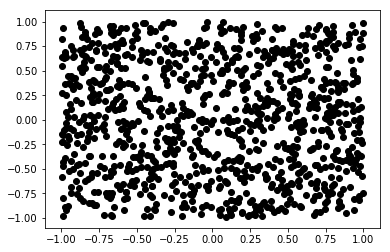

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], color="black")
plt.show()

In [6]:
# Left/Right
def gt_class1(point):
    if point[0]<0.0:
        return [1,0]
    else:
        return [0,1]

In [7]:
# Circle
import math

def gt_class2(point):
    x = point[0]
    y = point[1]
    dist = math.sqrt(x**2+y**2)
    if dist<0.5:
        return [1,0]
    else:
        return [0,1]

In [8]:
# Diagonal
import math

def gt_class3(point):
    x = point[0]
    y = point[1]
    if x*1.0+y*1.0<0.5:
        return [1,0]
    else:
        return [0,1]

Wählen Sie hier zwischen:

- gt_class1
- gt_class2
- gt_class3

um zu testen, wie gut das Perzeptron unterschiedliche Klassifikationsprobleme lösen kann.

In [9]:
gt_class = gt_class1

In [10]:
gt_class((-0.5,1.0))

[1, 0]

In [11]:
gt_class((-0.5,-1.0))

[1, 0]

In [12]:
gt_class((+0.1,-1.0))

[0, 1]

In [13]:
gt_class((+0.1,-.1))

[0, 1]

In [14]:
for p in data_x[:10]:
    print(p, gt_class(p))

[ 0.62547633  0.86894558] [0, 1]
[-0.31020962 -0.18919395] [1, 0]
[-0.61034536  0.24015851] [1, 0]
[ 0.78092968  0.05075688] [0, 1]
[ 0.80410028  0.73866312] [0, 1]
[-0.71854396 -0.044873  ] [1, 0]
[-0.92109893 -0.10825965] [1, 0]
[-0.70753573 -0.74395557] [1, 0]
[ 0.518785   -0.48217177] [0, 1]
[-0.25695418 -0.34726175] [1, 0]


In [15]:
data_y = [gt_class(p) for p in data_x]

In [16]:
data_y[:10]

[[0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0]]

In [17]:
data_y = np.array( [gt_class(p) for p in data_x ] )

In [18]:
type(data_y)

numpy.ndarray

In [19]:
data_y.shape

(1000, 2)

In [20]:
colors = [np.argmax(row) for row in data_y]

In [21]:
colors[:10]

[1, 0, 0, 1, 1, 0, 0, 0, 1, 0]

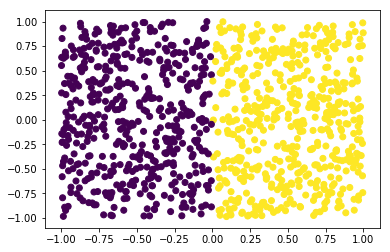

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], c=colors)
plt.show()

In [23]:
def generate_example_data(how_much):
    min_coord = -1.0
    max_coord = +1.0
    data_x = np.random.uniform(min_coord,max_coord, (how_much, 2))
    data_y = np.array( [gt_class(p) for p in data_x ] )
    return data_x, data_y

# Trainings- und Testdaten erzeugen

In [24]:
data_x, data_y = generate_example_data(1000)

In [25]:
data_x.shape

(1000, 2)

In [26]:
data_y.shape

(1000, 2)

In [27]:
N = int(data_x.shape[0] * 0.8)

In [28]:
N

800

In [29]:
x_train = data_x[:N]
y_train = data_y[:N]
x_test  = data_x[N:]
y_test  = data_y[N:]

In [30]:
x_train.shape

(800, 2)

In [31]:
y_train.shape

(800, 2)

In [32]:
x_test.shape

(200, 2)

In [33]:
y_test.shape

(200, 2)

# Netz aufbauen und trainieren

In [34]:
n_inputs = 2+1
n_outputs = 2
W = create_new_perceptron(n_inputs,n_outputs)

In [35]:
W.shape

(3, 2)

In [36]:
W

array([[-0.51994022,  0.05883627],
       [-0.12196871, -0.85974888],
       [-0.09516655,  0.00812293]])

In [37]:
test_perceptron(W, x_test, y_test)

Korrekt: 67 von 200


0.335

In [38]:
alpha = 0.01
nr_train_steps = 1000
history = train_perceptron(W,
                           x_train, y_train,
                           x_test, y_test,
                           nr_train_steps,
                           alpha)


Train step:  0
Korrekt: 67 von 200

Train step:  100
Korrekt: 110 von 200

Train step:  200
Korrekt: 153 von 200

Train step:  300
Korrekt: 173 von 200

Train step:  400
Korrekt: 183 von 200

Train step:  500
Korrekt: 188 von 200

Train step:  600
Korrekt: 190 von 200

Train step:  700
Korrekt: 192 von 200

Train step:  800
Korrekt: 190 von 200

Train step:  900
Korrekt: 192 von 200


# Netz testen

In [39]:
x_test.shape

(200, 2)

In [40]:
x_test[:5]

array([[ 0.33334606, -0.86927149],
       [ 0.48810852, -0.85289296],
       [-0.30746092,  0.95307963],
       [ 0.4987551 ,  0.32995591],
       [ 0.63584109,  0.36305378]])

In [41]:
y_test.shape

(200, 2)

In [42]:
y_test[:5]

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1]])

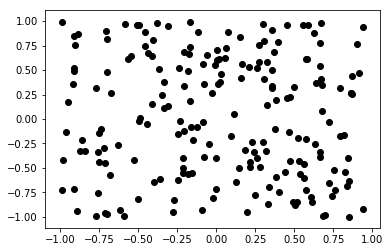

In [43]:
plt.scatter(x_test[:,0], x_test[:,1], color="black")
plt.show()

In [44]:
all_outputs = []
for row_vec in x_test:
    x = np.append(row_vec,[1])
    out = predict(W,x)
    all_outputs.append( out )

In [45]:
all_outputs[:10]

[array([ 0.19592114,  0.90550061]),
 array([ 0.07047011,  1.06311175]),
 array([ 0.70442428,  0.08965472]),
 array([ 0.05500195,  0.97189526]),
 array([0, 1]),
 array([ 0.82735212,  0.        ]),
 array([ 0.19706571,  0.80880828]),
 array([ 0.21402564,  0.71061534]),
 array([0, 1]),
 array([0, 1])]

In [46]:
colors = [np.argmax(outarray) for outarray in all_outputs]

In [47]:
colors[:20]

[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

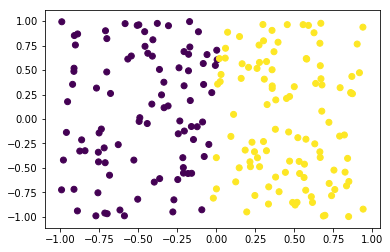

In [48]:
plt.scatter(x_test[:,0], x_test[:,1], c=colors)
plt.show()